#  Importing the required modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Download the data set

# 2. Load the dataset into the tool

In [4]:
data=pd.read_csv(r'C:\Users\User\Downloads\abalone.csv')
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# to find the age using rings

In [5]:
Age=1.5+data.Rings
data["Age"]=Age
data=data.rename(columns = {'Whole weight':'Whole_weight','Shucked weight': 'Shucked_weight','Viscera weight': 'Viscera_weight',
                            'Shell weight': 'Shell_weight'})
data=data.drop(columns=["Rings"],axis=1)
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# 3. Perform Below Visualizations

## Univariate Analysis

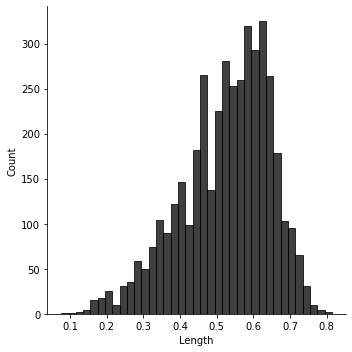

In [12]:
sns.displot(data["Length"], color='black')


## Bi-Variate Analysis

<AxesSubplot:>

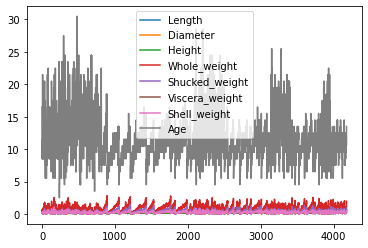

In [13]:
data.plot.line()

<AxesSubplot:xlabel='Length', ylabel='Height'>

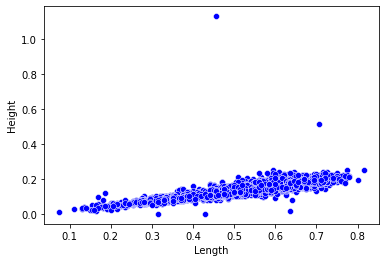

In [14]:
sns.scatterplot(x=data.Length,y=data.Height,color='Blue')

## Multi-Variate Analysis

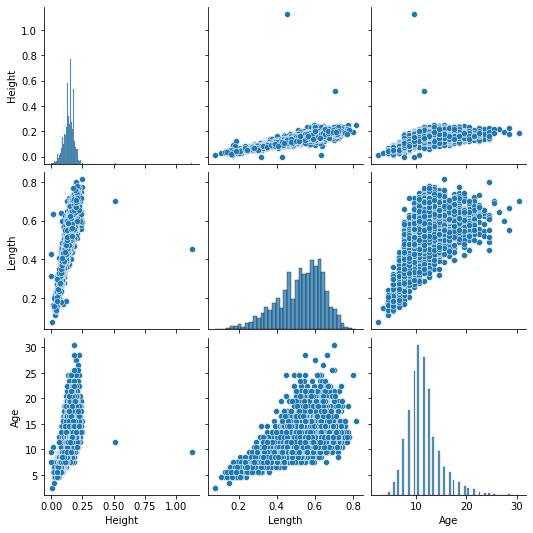

In [19]:
sns.pairplot(data=data[["Height","Length","Age"]])

# 4. Perform descriptive statistics on the dataset

In [20]:
data.describe(include='all')

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000


# 5. Check the missing value and deal with them

In [25]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Age               0
dtype: int64

# 6. Find the outliers and replace them outliers

In [23]:
outliers=data.quantile(q=(0.1,0.5))
outliers

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0.1,0.355,0.265,0.09,0.2050,0.0865,0.0433,0.065,7.5
0.5,0.545,0.425,0.14,0.7995,0.3360,0.1710,0.234,10.5


In [24]:
a = data.Age.quantile(0.1)
b = data.Age.quantile(0.5)
c = b - a
lower_limit = a - 1.5 * c
data.median(numeric_only=True)


Length             0.5450
Diameter           0.4250
Height             0.1400
Whole_weight       0.7995
Shucked_weight     0.3360
Viscera_weight     0.1710
Shell_weight       0.2340
Age               10.5000
dtype: float64

# 7. Check for Categorical columns and perform encoding

In [26]:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [27]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
data.Age = lab.fit_transform(data.Age)

data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,14
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,6
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,8
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,9
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,6


# 8. Split the data into dependent and independent variables

In [33]:
y = data["Sex"]
y.head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [34]:
x=data.drop(columns=["Sex"],axis=1)
x.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,14
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,6
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,8
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,9
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,6


# 9. Scale the inpendent variable

In [35]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.572290
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910328
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289674
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020654
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910328


# 10. Split the data into training and testing

In [42]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, y, test_size=0.2, random_state=0)
X_Train.shape,X_Test.shape


((3341, 8), (836, 8))

In [43]:
Y_Train.shape,Y_Test.shape

((3341,), (836,))

In [44]:
X_Train.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
3141,-2.864726,-2.750043,-1.423087,-1.622870,-1.553902,-1.583867,-1.644065,-1.530983
3521,-2.573250,-2.598876,-2.020857,-1.606554,-1.551650,-1.565619,-1.626104,-2.151637
883,1.132658,1.230689,0.728888,1.145672,1.041436,0.286552,1.538726,1.572290
3627,1.590691,1.180300,1.446213,2.164373,2.661269,2.330326,1.377072,0.020654
2106,0.591345,0.474853,0.370226,0.432887,0.255175,0.272866,0.906479,1.261963


In [45]:
Y_Train.head()


3141    I
3521    I
883     M
3627    M
2106    M
Name: Sex, dtype: object

In [46]:
Y_Test.head()


668     M
1580    I
3784    M
463     I
2615    M
Name: Sex, dtype: object

# 11. Build the model

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')
model.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [53]:
model.fit(X_Test,Y_Test)


RandomForestClassifier(criterion='entropy', n_estimators=10)

# 12. Train the Model

In [58]:
X_Train

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
3141,-2.864726,-2.750043,-1.423087,-1.622870,-1.553902,-1.583867,-1.644065,-1.530983
3521,-2.573250,-2.598876,-2.020857,-1.606554,-1.551650,-1.565619,-1.626104,-2.151637
883,1.132658,1.230689,0.728888,1.145672,1.041436,0.286552,1.538726,1.572290
3627,1.590691,1.180300,1.446213,2.164373,2.661269,2.330326,1.377072,0.020654
2106,0.591345,0.474853,0.370226,0.432887,0.255175,0.272866,0.906479,1.261963
...,...,...,...,...,...,...,...,...
1033,1.049379,1.180300,1.087551,1.617803,1.374865,1.294753,1.711157,0.020654
3264,1.091018,0.928354,0.011563,0.696995,0.816146,1.249133,0.331708,0.641308
1653,0.591345,0.424464,0.131117,0.265653,0.466947,0.236370,0.105392,0.020654
2607,0.841182,0.827576,0.609334,0.608279,0.530028,0.510090,0.572393,-0.289674


In [59]:
Y_Train

3141    I
3521    I
883     M
3627    M
2106    M
       ..
1033    M
3264    F
1653    M
2607    F
2732    I
Name: Sex, Length: 3341, dtype: object

# 13. Test the Model

In [55]:
print('Training accuracy: ',accuracy_score(Y_Train,y_predict_train))

Training accuracy:  0.9820413049985034


# 14. Measure the performance using Metrics

In [56]:
pd.crosstab(Y_Test,y_predict)

col_0,F,I,M
Sex,,,
F,109,37,103
I,38,217,36
M,119,55,122


In [57]:
print(classification_report(Y_Test,y_predict))

              precision    recall  f1-score   support

           F       0.41      0.44      0.42       249
           I       0.70      0.75      0.72       291
           M       0.47      0.41      0.44       296

    accuracy                           0.54       836
   macro avg       0.53      0.53      0.53       836
weighted avg       0.53      0.54      0.53       836

